#### **CS 418 Final Project Report Rose Matcha**

Link to our github repo: https://github.com/uic-ds-fall2024/class-project-rose-matcha 

#### **Project Introduction**

For this project, we are analyzing data relevant to predicting the obesity of individuals by analyzing various health and lifestyle factors. To accomplish this, we are using two datasets: Our first, and primary, dataset from the CDC consists of roughly 250,000 instances of a variety of health indicators such as gender, age, BMI, smoker status, etc. The main population for this dataset is individuals residing in the United States. As for our second dataset, we wanted to observe how the obesity prediction and the factors leading to its prediction may be similar or different for another population compared to the US. As such, we found a dataset consisting of roughly 2100 instances of a variety of health indicators for individuals residing in the Latin American countries of Mexico, Peru, and Colombia. In terms of our goals, we aim to answer the question of how accurately we can quantify the prediction of obesity in these two countries, which features/predictors are the most influential to predicting obesity in each dataset, and between the two datasets/populations what similarities and differences are there regarding the prediction of obesity and the most significant factors in terms of predicting obesity. 

#### **Data Cleaning**

We have two datasets to clean which are the CDC dataset (US population) and the latin america dataset

**CDC Data Cleaning**

As can be seen below, not too many steps need to be taken to clean the CDC data. There are no missing values in the dataset to address. Note that we do not have a feature for obesity yet with two levels (obese/non obese), so we will create that feature in this step using the fact that an obese individual is defined to have a BMI of at least 30.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print(df.shape)
print(df.dtypes)
print(f'Number of null values in the dataset: {df.isnull().sum().sum()}')

df['Obese'] = np.where(df['BMI'] >= 30, 1, 0)
display(df.head())

(253680, 22)
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
Number of null values in the dataset: 0


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Obese
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,1
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0


**Latin America Data Cleaning**

For this dataset, there is more cleaning that needs to be done relative to the CDC dataset. For one, some columns in this dataset, like FAVC or FCVC, are quite ambiguous in terms of what they represent, so we will rename these columns to make their meaning more evident. Also, many of our feature variables have values with categorical labels, like "Sometimes", "Always", or "Yes"/"No". It is critical that we encode these categorical features with numeric integer values to indicate their levels to get the most optimal results for when we fit machine learning models to our dataset. Similarly to the CDC dataset, we also create the obesity feature from BMI, and we create BMI from the definition that BMI is the weight in kilograms divided by the square of the height in meters. We have features for both weight (kg) and height (meters), so we will be able to create a BMI feature from this. 

In [6]:
df_latin = pd.read_csv('latin_america_obesity.csv')

# Many of the columns in this dataset do not have very meaningful column names, so we are renaming them
df_latin.rename(columns = {'FAVC' : 'eat_high_caloric', 'FCVC' : 'eat_vegetables', 'NCP' : 'num_meals_per_day', 'CAEC' : 'food_between_meals', 'CH2O' : 'water_per_day', 'FAF' : 'physical_activity', 
                           'TUE' : 'technology_usage', 'CALC' : 'alcohol_consumption', 'MTRANS' : 'transportation_method', 'SCC' : 'calories_per_day'}, inplace = True)


# Here, we encode the categorical features with numeric integer values to indicate their levels.
df_latin['Gender'] = df_latin['Gender'].replace({'Female' : 0, 'Male' : 1})
df_latin['family_history_with_overweight'] = df_latin['family_history_with_overweight'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['eat_high_caloric'] = df_latin['eat_high_caloric'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['SMOKE'] = df_latin['SMOKE'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['calories_per_day'] = df_latin['calories_per_day'].replace({'yes' : 1, 'no' : 0}).astype(int)
df_latin['food_between_meals'] = df_latin['food_between_meals'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}).astype(int)
df_latin['alcohol_consumption'] = df_latin['alcohol_consumption'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3}).astype(int)
df_latin['transportation_method'] = df_latin['transportation_method'].replace({'Bike' : 1, 'Motorbike' : 2, 'Walking' : 3, 'Automobile' : 4, 'Public_Transportation' : 5})


'''For this dataset, we do not have features for BMI or Obesity. We will need to create them manually, 
   so create BMI from its definition of weight/(height^2) and create Obese feature from the definition that an Obese individual has a BMI of at least 30'''
df_latin['BMI'] = round(df_latin['Weight'] / (df_latin['Height'] ** 2), 1)
df_latin['Obese'] = np.where(df_latin['BMI'] >= 30, 1, 0)

'''remove the previous obesity column since we create the binary obesity column based off the value of BMI. 
   This is to ensure consistency in how we determine the obesity feature between the two datasets.'''
df_latin = df_latin.drop('NObeyesdad', axis = 1) 
display(df_latin.head())
print(df.dtypes)
print(df.shape)

,Gender,Age,Height,Weight,family_history_with_overweight,eat_high_caloric,eat_vegetables,num_meals_per_day,food_between_meals,SMOKE,water_per_day,calories_per_day,physical_activity,technology_usage,alcohol_consumption,transportation_method,BMI,Obese
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,5,24.4,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,5,24.2,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,5,23.8,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,26.9,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,5,28.3,0


Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
Obese                     int64
dtype: object
(253680, 23)


#### **Exploratory Data Analysis (EDA)**

We performed EDA on both out Latin America and CDC datasets

**CDC Dataset**

In [ ]:
# Get summary statistics for each feature in the dataframe
display(df.describe())

# Find the proportion of non-obese and obese individuals in the CDC dataset
non_obese = df.loc[df['Obese'] == 0, 'Obese']
obese = df.loc[df['Obese'] == 1, 'Obese']
print(f'\nPercentage of non-obese individuals in the dataset: {round(((len(non_obese) / len(df)) * 100), 3)}%')
print(f'Percentage of obese individuals in the dataset: {round(((len(obese) / len(df)) * 100), 3)}%')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Obese
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.346306
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.475793
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000



Percentage of non-obese individuals in the dataset: 65.369%
Percentage of obese individuals in the dataset: 34.631%


In terms of our data, the majority of our feature variables seem to binary because as seen in the summary statistics for the dataframe, there are many columns such as HighBP, highChol, etc which have a maximum value of 1.0 which indicates that the feature takes on values between 0 and 1. In the context of the data, this means that for a given individual, for highBP for instance, they either have high blood pressure or they do not. One feature of interest to us is the Obese feature since it is our target feature (i.e. what we are trying to predict). As such, we wanted to observe the relative proportion of each class (i.e. Obese, Class 1 and Not Obese, Class 0) to see if we have any class imbalance in our target feature. What we found was that roughly 65% of the individuals in our dataset are not obese and 35% are obese. These proportions may pose an issue when fitting our machine learning models, as to ensure the most optimal prediction we want the proportion of the two classes to be roughly equal, so around 50% for each class. We will address this data imbalance issue upon fitting our machine learning models.

**Latin America Dataset**

In [8]:
display(df_latin.describe())

non_obese_latin = df_latin.loc[df_latin['Obese'] == 0, 'Obese']
obese_latin = df_latin.loc[df_latin['Obese'] == 1, 'Obese']
print(f'\nPercentage of non-obese individuals in the dataset: {round(((len(non_obese_latin) / len(df_latin)) * 100), 3)}%')
print(f'Percentage of obese individuals in the dataset: {round(((len(obese_latin) / len(df_latin)) * 100), 3)}%')

,Gender,Age,Height,Weight,family_history_with_overweight,eat_high_caloric,eat_vegetables,num_meals_per_day,food_between_meals,SMOKE,water_per_day,calories_per_day,physical_activity,technology_usage,alcohol_consumption,transportation_method,BMI,Obese
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,4.701563,29.700284,0.461866
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.577618,8.011220,0.498662
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,4.000000,24.300000,0.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,5.000000,28.700000,0.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,5.000000,36.000000,1.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,50.800000,1.000000



Percentage of non-obese individuals in the dataset: 53.813%
Percentage of obese individuals in the dataset: 46.187%


For this dataset on individuals in Latin America, we performed a similar EDA as we did to individuals in the CDC dataset. As seen in the above summary statistics for the dataset, similarly to the CDC dataset there are many features with a maximum value of 1 indicating that those are binary features, like eat_high_caloric which represents whether or not an individual eats high calorie food. Another interesting finding is that there are a few features, such as transporation_method, which have a maximum value of 5. This indicates that those features have multiple labels contrary to the simple 0 or 1 to indicate "yes"/"no" for a lot of our features. Since we are trying to predict obesity for latin american individuals as well, we also wanted to gain some insight into our feature variable "Obese". As such, we found the proportion of each class of obese (i.e. obese/not obese) in the obesity feature. What we found was that roughly 54% of the individuals in our dataset are not obese and 46% are obese, which indicates that the proportions for each class are roughly equal. This is ideal for our when we have to fit our machine learning models as we will not need to address data imbalance issues with this population, contrary to the CDC dataset population. 

#### **Machine Learning / Statistical Analysis**

We will perform an ML analysis on both the CDC and Latin America Dataset. Since we are predicting a binary outcome - Obese or not Obese - we will use classification models, specifically logistic regression and decision tree classifier. 

**Logistic Regression CDC Dataset**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_cdc = df.drop(columns = ['BMI', 'Obese'])
y_cdc = df[['Obese']]
feature_names_cdc = X_cdc.columns

scaler = StandardScaler()
X_cdc = scaler.fit_transform(X_cdc)

logistic_regression_model_cdc = LogisticRegression(class_weight = 'balanced', random_state=125, max_iter=1000)
k = 10
stratified_k_fold_cdc = StratifiedKFold(n_splits = k, shuffle = True, random_state = 125)
accuracies_logistic_cdc = cross_val_score(logistic_regression_model_cdc, X_cdc, np.ravel(y_cdc), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_cdc = np.mean(accuracies_logistic_cdc)
accuracies_logistic_cdc

np.float64(0.658628981393882)

We fit a logistic regression model to our CDC dataset to predict obesity with the class weight parameter set to balanced to handle the data imbalance issue in our target feature Obese. We utilized 10 fold cross validation to ensure that our logistic regression model is tested on a variety of different subsets of the data (helps to prevent overfitting) and the average accuracy was roughly 65.87%. If we assume the baseline accuracy to be 50%, then our logistic regression model is roughly 15.87% better in predicting obesity relative to the baseline. 

**Decision Tree Classifier CDC Dataset**

In [15]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model_cdc = DecisionTreeClassifier(class_weight = 'balanced', random_state = 125)
accuracies_decision_tree_cdc = cross_val_score(decision_tree_model_cdc, X_cdc, np.ravel(y_cdc), cv = stratified_k_fold_cdc, scoring='accuracy')
accuracies_decision_tree_cdc = np.mean(accuracies_decision_tree_cdc)
accuracies_decision_tree_cdc

np.float64(0.6140807316304006)

We fit a decision tree classifier model to our CDC dataset to predict obesity with the class weight parameter set to balanced to handle the data imbalance issue in our target feature Obese. We utilized 10 fold cross validation to ensure that our decision tree model is tested on a variety of different subsets of the data (helps to prevent overfitting) and the average accuracy was roughly 61.40%. If we assume the baseline accuracy to be 50%, then our decision tree classifier model is roughly 11.40% better in predicting obesity relative to the baseline. 

**Logistic Regression Latin America Dataset**

In [16]:
X_latin = df_latin.drop(columns = ['BMI', 'Obese', 'Weight', 'Height'])
y_latin = df_latin[['Obese']]
feature_names_latin = X_latin.columns

scaler = StandardScaler()
X_latin = scaler.fit_transform(X_latin)

logistic_regression_model_latin = LogisticRegression(random_state = 125)

accuracies_logistic_latin = cross_val_score(logistic_regression_model_latin, X_latin, np.ravel(y_latin), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_logistic_latin = np.mean(accuracies_logistic_latin)
accuracies_logistic_latin

np.float64(0.755593311276044)

We fit a logistic regression model to our latin america dataset to predict obesity of individuals in the Latin American population. We utilized 10 fold cross validation to ensure that our logistic regression model is tested on a variety of different subsets of the data (helps to prevent overfitting) and the average accuracy was roughly 75.55%. If we assume the baseline accuracy to be 50%, then our logistic regression model is roughly 25.55% better in predicting obesity relative to the baseline. Additionally, our logistic regression model for the latin american population does a better job of predicting obesity than the logistic regression model for the CDC dataset (US population) since it has a higher accuracy of roughly 75.55% compared to 65.87% for CDC.  

**Decision Tree Classifier Latin America Dataset**


In [17]:
decision_tree_model_latin = DecisionTreeClassifier(random_state=125)

accuracies_decision_tree_latin = cross_val_score(decision_tree_model_latin, X_latin, np.ravel(y_latin), cv = stratified_k_fold_cdc, scoring = 'accuracy')
accuracies_decision_tree_latin = np.mean(accuracies_decision_tree_latin)
accuracies_decision_tree_latin

np.float64(0.8768353751229545)

We fit a decision tree classifier model to our latin america dataset to predict obesity of individuals in the Latin American population. We utilized 10 fold cross validation to ensure that our decision tree model is tested on a variety of different subsets of the data (helps to prevent overfitting) and the average accuracy was roughly 87.68%. If we assume the baseline accuracy to be 50%, then our decision tree classifier model is roughly 37.68% better in predicting obesity relative to the baseline. Additionally, our decision tree model for the latin american population does a better job of predicting obesity than the decision tree model for the CDC dataset (US population) since it has a higher accuracy of roughly 87.68% compared to 61.40% for CDC.

##### **Feature Importance From Decision Tree ML Analysis**

One goal for our project was to see which factors in across both the US and latin america populations are most important for predicting obesity. We are able to do this by obtaining the feature importances from the decision tree classifier, and we plot the most important features for both the US (CDC dataset) and latin american population. 

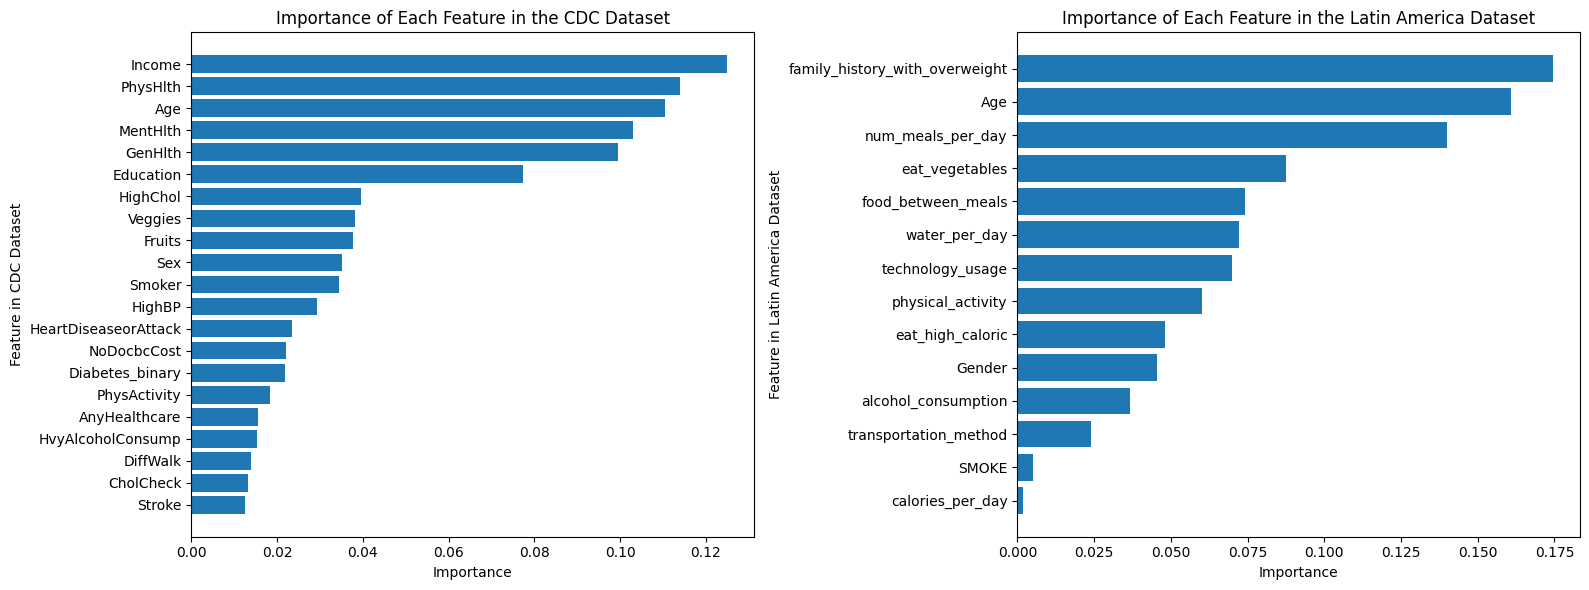

In [21]:
'''CDC Feature Importance'''
y_cdc = np.ravel(y_cdc)

feature_importances_list = []
for train_index, test_index in stratified_k_fold_cdc.split(X_cdc, y_cdc):
    X_train, X_test = X_cdc[train_index], X_cdc[test_index]
    y_train, y_test = y_cdc[train_index], y_cdc[test_index]

    decision_tree_model_cdc.fit(X_train, y_train)

    feature_importances_list.append(decision_tree_model_cdc.feature_importances_)

average_feature_importances = np.mean(feature_importances_list, axis = 0)
feature_importances_df = pd.DataFrame({
    'Feature': feature_names_cdc,
    'Importance': average_feature_importances
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

'''Latin America Feature Importance'''
y_latin = np.ravel(y_latin)

feature_importances_list_latin = []
for train_index, test_index in stratified_k_fold_cdc.split(X_latin, y_latin):
    X_train, X_test = X_latin[train_index], X_latin[test_index]
    y_train, y_test = y_latin[train_index], y_latin[test_index]

    decision_tree_model_latin.fit(X_train, y_train)

    feature_importances_list_latin.append(decision_tree_model_latin.feature_importances_)

average_feature_importances_latin = np.mean(feature_importances_list_latin, axis = 0)
feature_importances_df_latin = pd.DataFrame({
    'Feature': feature_names_latin,
    'Importance': average_feature_importances_latin
})
feature_importances_df_latin = feature_importances_df_latin.sort_values(by='Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(
    feature_importances_df['Feature'],
    feature_importances_df['Importance'],
    align='center'
)
axes[0].invert_yaxis()  
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('Feature in CDC Dataset')
axes[0].set_title('Importance of Each Feature in the CDC Dataset')

axes[1].barh(
    feature_importances_df_latin['Feature'],
    feature_importances_df_latin['Importance'],
    align='center'
)
axes[1].invert_yaxis()  
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Feature in Latin America Dataset')
axes[1].set_title('Importance of Each Feature in the Latin America Dataset')

plt.tight_layout()
plt.show()


From these feature importance plot we can see that the most important features for predicting obesity in the US population covered by the CDC dataset are factors like income, physical health, age, mental health, etc. From the feature importance plot for the latin america population, we can see that the most important features for predicting obesity in the Latin American Population (Mexico, Peru, Colombia) are having a family history with being overweight, age, number of meals per day, whether or not a person eats vegetables, etc.

##### **Additional Work - One Additional ML Model**

We decided that for our additional work requirement, we wanted to utilize one more ML model. For the ML model, we chose the bagging classifer as we previously used a decision tree but a singular decision tree is known to be prone to overfitting and has high variance. Thus, to ideally achieve a reduction in variance while preserving a similar accuracy to the original decision tree classifier, we chose to use the bagging ensemble method as it is well suited for reducing variance. Similar to our other ML models, we will fit the bagging model on both the CDC and latin america datasets. 

**CDC Dataset**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model_cdc = BaggingClassifier(estimator = decision_tree_model_cdc, n_estimators=50, bootstrap=True, random_state=125)

stratified_k_fold_cdc = StratifiedKFold(n_splits=5, shuffle=True, random_state=125)
accuracies_bagging_model_cdc = cross_val_score(bagging_model_cdc, X_cdc, np.ravel(y_cdc), cv=stratified_k_fold_cdc, scoring='accuracy')
mean_accuracy_bagging_model_cdc = np.mean(accuracies_bagging_model_cdc)

print(f"Bagging Model Accuracy: {mean_accuracy_bagging_model_cdc:.4f}")


Bagging Model Accuracy: 0.6546


We fit a bagging model to our CDC dataset with the decision tree classifier as our base model. We included 50 decision trees in the ensemble and used bootstrap sampling. Additionally, we also used stratified K fold cross validation to train our model with 5 folds as stratified K fold is well suited for imbalanced data like what we have in the CDC dataset. The average accuracy across these 5 folds for the bagging model was roughly 65.46%. If we assume the baseline accuracy to be 50%, then our bagging model is roughly 15.46% better in predicting obesity relative to the baseline. Furthermore, our bagging model achieved a slighly better accuracy than the decision tree classifer model on the same CDC dataset, with an accuracy of roughly 65.46% compared to 61.40%, so we can infer that our bagging model has a both a lower bias and lower variance than our original decision tree classifier. 

**Latin America Dataset**

In [26]:
bagging_model_latin = BaggingClassifier(estimator = decision_tree_model_latin, n_estimators=50, bootstrap=True, random_state=125)

stratified_k_fold_latin = StratifiedKFold(n_splits=5, shuffle=True, random_state=125)
accuracies_bagging_model_latin = cross_val_score(bagging_model_latin, X_latin, np.ravel(y_latin), cv=stratified_k_fold_latin, scoring='accuracy')
mean_accuracy_bagging_model_latin = np.mean(accuracies_bagging_model_latin)

print(f"Bagging Model Accuracy: {mean_accuracy_bagging_model_latin:.4f}")

Bagging Model Accuracy: 0.9280


We fit a bagging model to our latin america dataset with the decision tree classifier as our base model. We included 50 decision trees in the ensemble and used bootstrap sampling. Additionally, we also used stratified K fold cross validation to train our model with 5 folds. The average accuracy across these 5 folds for the bagging model was roughly 92.80%. If we assume the baseline accuracy to be 50%, then our bagging model is roughly 42.80% better in predicting obesity relative to the baseline. Furthermore, our bagging model achieved a slighly better accuracy than the decision tree classifer model on the same latin american dataset, with an accuracy of roughly 92.80% compared to 87.68%, so we can infer that our bagging model has a both a lower bias and lower variance than our original decision tree classifier for the latin america dataset. 

#### **Visualization**

One of the main goals of our project is to explore what factors are linked to obesity. The goal of our visualizations is to present these links in a format that should present clear trends and be simple to see. To do this, we created two visualizations both from the CDC dataset. The first visualization aims to explore the link between exercise and BMI across age ranges in the US population. The second visualization aims to visualize the link between eating healthy and BMI among individuals in the US population.

**Visualization #1: Exercise and BMI**

The hypothesis that we are going to be exploring for this visualization is that exercising is likely to lead to a decrease in an individuals BMI. This is because exercising burns calories, and burning calories leads to losing weight. Therefore we expect that exercising lowers an individual's BMI and decreases the odds of them being obese.

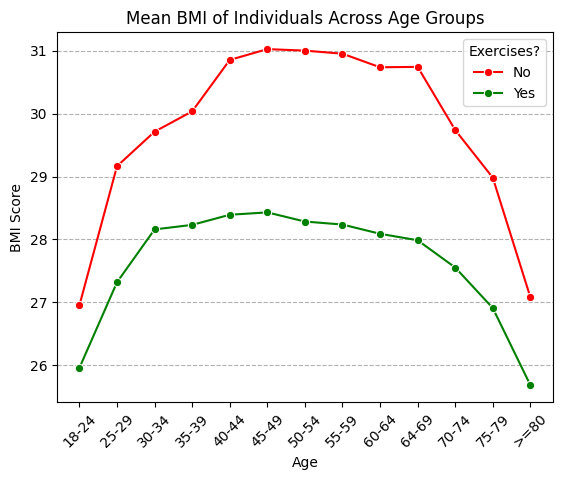

In [27]:
#get rid of people who didnt provide their age
df = df[df['Age'] != 14.0]

#create a lineplot using data from the dataframe, with income on the x axis and BMI on the y axis
axs = sns.lineplot(data = df, marker = 'o', x = 'Age', y = 'BMI', hue = 'PhysActivity', estimator = np.mean, errorbar = None, palette=['red', 'green'])
plt.grid(linestyle = '--', axis = 'y', which = 'major')

#create a title and labels
plt.title("Mean BMI of Individuals Across Age Groups")
plt.ylabel("BMI Score")
plt.xlabel("Age")

#create a legend for the graph
plt.legend(title = 'Exercises?', loc = 'upper right', bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

#rename the age values to meaningful labels
plt.xticks([1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13], ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54','55-59', '60-64', '64-69', '70-74', '75-79', '>=80'])
#rotate the x labels
axs.tick_params(axis='x', rotation=45)

plt.show()

This was an interesting hypothesis to explore as it not only confirmed our hypothesis, but also showed that it is true accross all age ranges. We also found it interesting that the graph seems to show a similar curve across both groups, showing trends in BMI across age ranges regardless of exercise habits. It can also be said that regardless of exercise, young and old people had lower BMI scores that middle aged and upper middle aged people in the US population. All in all, it can be said that the results of this graph shows a relationship between obesity and exercise habits across age groups.

**Visualization #2: Eating Habits and BMI**

The hypothesis that we are going to be exploring is that eating healthy will
lead to a lower BMI across all individuals. This is due to the fact that
the variables we tested, fruits and veggies, are low in calories and
tend to be full of healthy nutrients. We felt that those who did not have
these groups present in their diets are more likely to be substituting
them with less healthy, more calorie dense alternatives.


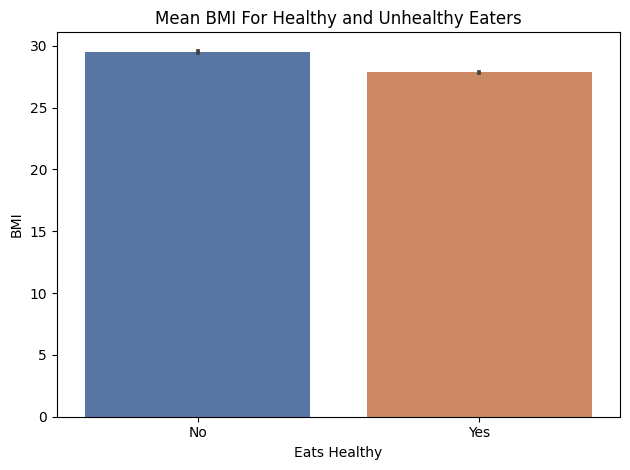

In [32]:
smokers_drinkers = df[(df['Fruits'] == 0) & (df['Veggies'] == 0)]
non_smokers_drinkers = df[(df['Fruits'] == 1) & (df['Veggies'] == 1)]

smokers_drinkers.loc[:, 'unhealthy'] = '1'
non_smokers_drinkers.loc[:, 'unhealthy'] = '0'

all_individuals = pd.concat([smokers_drinkers, non_smokers_drinkers])

axs = sns.barplot(x='unhealthy', y='BMI', data=all_individuals, palette='deep')
plt.xlabel('Eats Healthy')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Mean BMI For Healthy and Unhealthy Eaters')
plt.tight_layout()
plt.show()

This was an interesting hypothesis to explore as the results of the visualization confirm our hypothesis, but not as much as expected. The difference in average BMIs was only a couple scores, less than we anticipated due to the fact that the mean of the group that doesn’t eat healthy is under the obesity range.

#### **Results**

Overall, we were able to accomplish the goals of our project. This is because we were able to create classification machine learning
models to predict the obesity of an individual across two underlying populations (US and Latin America) with respectable
accuracies hovering between roughly 60-92%, depending on the specific model and population. For instance, our logistic
regression for the US population had an accuracy of roughly 65.86% while our decision tree classifier model for the Latin
America population had an accuracy of roughly 87.68% which indicates that our models worked well in predicting obesity.  
Our best performing ML model was the bagging model on the Latin American dataset with an accuracy of roughly 92.80%. 

Furthermore, we also wanted to see which factors were most important in predicting obesity in each specific population.
We successfully accomplished this through our use of feature importances from the decision tree classifier and subsequent
construction of the feature importance plots seen in the above ML analysis and feature importance section. 
To recap on this, in the US population factors like income, physical health, age, and mental health among others were key contributors to obesity. 
In the Latin American population, factors like having a family history with being overweight, age, number of meals per day, and whether or not a person eats vegetables were key contributors to obesity. 

All in all, our overall goal was to accurately predict the obesity of an individual from both the United States and Latin
America populations in addition to understanding the most important factors in predicting obesity in both populations. As
previously stated, we were able to accomplish this through our use of Machine Learning and visualizations and we now have achieved a greater understanding of the factors contributing to obesity 
in the US and Latin American populations as well as how to build well performing/accurate models for predicting obesity. 
